<a href="https://colab.research.google.com/github/LeksaAura/dataset.ipynb/blob/main/Desiciontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/decisiontree_1.csv')
encoding = {"mesin": {"bensin" : 0, "diesel" : 1},
            "penggerak" : {"depan" : 0, "belakang" : 1}}
data.replace(encoding, inplace=True)

/tmp/ipython-input-2608230171.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(encoding, inplace=True)


In [6]:
data.head()

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


In [7]:
x = data.drop(['ID', 'label'], axis =1)
y = data['label']

In [12]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(x,y, test_size=0.3)

In [13]:
import sklearn.tree as tree
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
y_prediksi = model.predict(X_test)
y_prediksi

array(['minibus', 'minibus', 'minibus', 'sedan', 'sedan', 'sedan',
       'minibus', 'minibus', 'sedan', 'sedan'], dtype=object)

In [15]:
import sklearn.metrics as met
print (met.accuracy_score(y_test, y_prediksi))

1.0


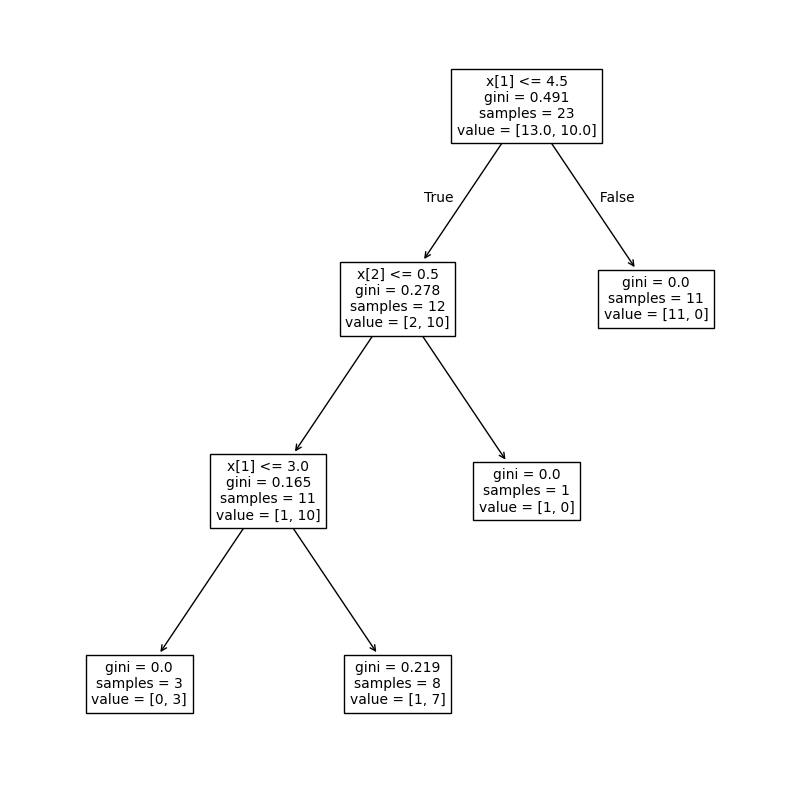

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(model, fontsize=10)
plt.show()